# Chap 15 심층 합성곱 신경망으로 이미지 분류

이번 장에서는 CNN을 알아봅시다.
- 1차원과 2차원의 합성곱 연산 이해하기
- CNN 구조의 구성 요소 배우기
- 텐서플로우를 사용하여 심층 합성곱 신경망 구현하기

# Chap 15.1 합성곱 신경망의 구성 요소

합성곱 신경망(CNN)은 뇌의 시각피질이 물체를 인식할 때 동작하는 방식에서 영감을 얻은 모델.<br>
1990년대 얀 르쿤과 동료들이 손글씨 분류의 새 신경망 구조 발표.<br>
이 과정에서 CNN이 좋은 성능을 내어 크게 주목, 이후 머신러닝에 크게 기여.



# Chap 15.1.1 CNN과 특성 계층 학습

머신러닝 알고리즘의 성능은 관련높은 핵심 특징을 추출하는 것이 중요.<br>
전통적 모델과는 달리 신경망은 원본데이터에서 작업에 가장 유용한 특성을 자동으로 학습함.<br>
CNN은 각 층별로 저수준 특성을 연결하여 고수준 특성을 만듦으로서 소위 특성 계층을 구성함.

![python image2](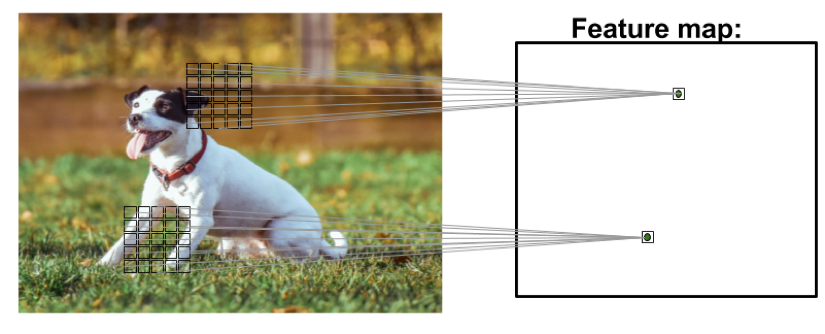%0A)

위의 그림과 같이 CNN은 입력 이미지에서 <font color='red'>특성맵(feature map)</font>을 만듦 이맵의 각 원소는 입력 이미지의 국부적인 <font color='red'>픽셀 패치(patch)</font>를 만듦<br>
이런 국부적인 픽셀 패치를 <font color='red'>국부 수용장(local receptive field)</font>라고 말함.

CNN은 2개의 아이디어로 이미지관련 작업에 강세를 보임.<br><br>
- <font color='blue'>최소 연결</font>: 특성 맵에 있는 하나의 원소는 작은 픽셀 패치 하나에만 연결된다. <br><br> 
- <font color='blue'>파라미터 공유</font>:동일한 가중치가 입력 이미지의 모든 패치에 사용됨<br><br>위 2개의 역활로 파라미터가 크게 감소하고 중요 특징파악이 좋아짐

CNN은 여러 개의 <font color='red'>합성곱(conv)</font>층과 <font color='red'>풀링(pooling)</font>이라고도 하는 <font color='red'>서브 샘플링(subsampling)</font>층과 하나 이상의 <font color='red'>완전 연결(FC)</font>층으로 이루어짐

- <font color='blue'>합성곱</font>: 하나의 함수와 또 다른 함수를 반전 이동한값을 곱한 후 구간에 대해 적분하는 방식 <br><br> 
- <font color='blue'>풀링</font>:합성곱을 겨쳐나온 활성화 맵이 있을때 크기 조정하여 새 레이어를 얻는것  <br><br>
- <font color='blue'>완전 연결 계층</font>:이전 레이어의 모든 노드가 다음 레이어의 모든 노드에 연결된 레이어<br><br>

# Chap 15.1.2 이산 합성곱 수행

<font color='red'>이산 합성곱(discrete convolution)</font>은 CNN의 기본 연산이다<br>

<h4>1차원 합성곱 연산 수행</h4><br>
기본 식은 y = x * w 이며 x는 입력을 나타내고 w는 필터,커널이라고 부른다.<br>
<br><br><br>
$$ y = x * w \rightarrow y[i] = \sum_{i=1}^{+∞} x [i-k]w[k] $$
<br><br>
여기서 대괄호[]는 벡터 원소의 인덱스를 나타내는데 사용한다.
인덱스i는 출력벡터y의 각 원소에 대응한다. 또한 공식에 2가지 특이점이 존재한다.

<h4>이산 합성곱 특이점</h4><br>
-∞서 +∞까지의 인덱스와 음수 인덱싱 2개가 존재한다.<br>
첫째 인덱스 -∞부터 +∞까지의 합은 항상 유한한 특성 벡터를 다루는 머신러닝 특성상 이상하게 보인다. 계산을 위해 x와 w가 0으로 채워져 있다고 가정해야한다. 또한 출력 벡터y도 0으로 채워진 무한 크기가 되어야한다.<br>

위의 과정을 <font color='red'>패딩(padding)</font>이라고 한다.<br>
<img src="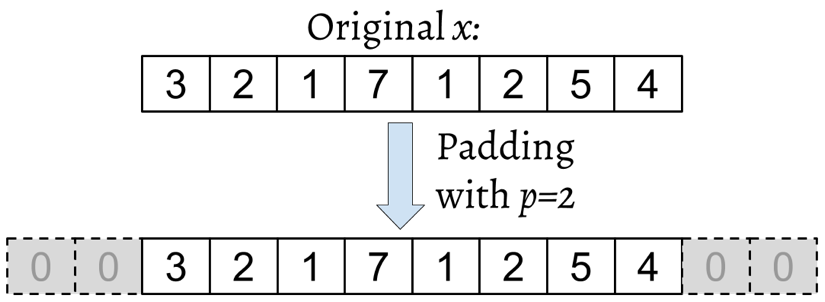%0A" width=700><br>
위에 그림과 같이 패딩을 하며 각 방향으로 추가된 패딩수는 p로 나타낸다.<br>
원본 입력x와 필터w가 각각n개, m개의 원소를 가지고 m<=n 라고 가정해본다. 패딩된 벡터 $x^p$의 크기는 n +2p 이다.

$$ y = x * w \rightarrow y[i] = \sum_{i=1}^{k=m-1} x^p [i+m-k]w[k] $$

위의 공식은 이산 합성곱을 계산하기위한 실제 공식이다.<br>
식을 보면 i+m-k 로 x를 인덱싱을 한다.<br>
이로인해 패딩된후, x또는 w벡터 중 하나를 뒤집어 간단히 점곱으로 계산이 가능

필터 w를 뒤집어서 회저된 필터 $w^r$을 얻었다고 가정시 점곱 x[i:i + m] * $w^r$ 을 계산하면 y[i]원소 하나가 얻어지고 x[i:i +m]은 크기가 m인 x의 패치가 된다.

<img src="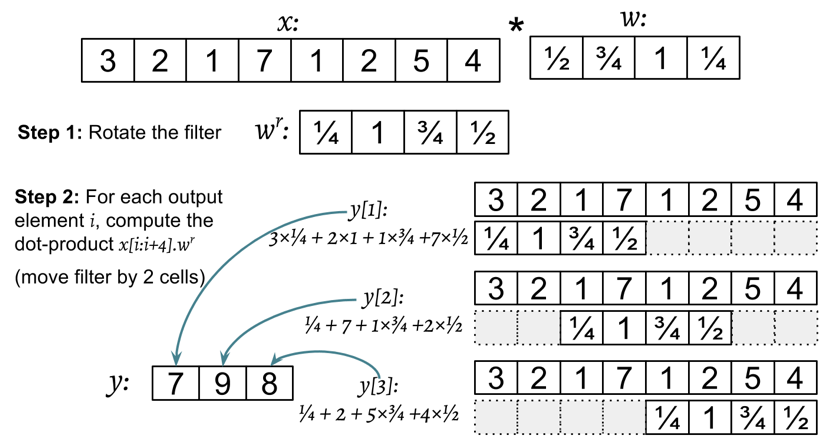%0A" width=700>

위 의 사진은 x=(3,2,1,7,1,2,5,4)이고 w=(1/2,3/4,1,1/4) 일때 처음 세개의 출력 원소를 계산하는 예이다.

사진에서의 패딩 크기는 0이다. 회전된 필터 $w^r$은 2칸씩 이동하며 이러한 이동하는 양은<br><font color='red'>스트라이드(stride)</font>라고 하며 또 하나의 합성곱 하이퍼파라미터이다.<br>
여기서 스트라이드는 2(s=2)이다.<br>
주의할것은 스트라이드는 입력 벡터의 크기보다 작은 양수 값이어야 한다.

<h4>합성곱에서 (제로)패딩의 효과</h4><br>
지금까지 유한한 크기의 출력 벡터를 얻기 위해 합성곱에 패딩을 사용하였다.<br>기술적으로 p>=0인 어떤 패딩도 적용이 가능하다. 그리고 p값에 따라 x에서 경계에 있는 셀은 중간 셀과 다르게 처리된다.<br>

n=5 m=3 p=0인 경우를 예를 들어보자. x[0]는 하나의 출력원소를 계산하는데만사용된다.(y[0]1개)<br>
반면x[1]은 두 개의 출력 원소를 계산하는데 사용된다.<br>(y[0].[1]2개)<br>
x원소를 이렇게 다르게 취급하기 때문에 가운데 있는x[2]가 대부분의 계산에 사용되어 강조되는 효과를 낸다.<br>

![python image2](https://github.com/Desmond2429/qwerty/blob/master/ima.png?raw=true)

출력 y크기는 사용한 패딩방법에 따라 달라지는데 위에 그림(x=5 w=3 s=1)처럼<br>
<font color='red'>풀 패딩,</font><font color='red'> 세임패딩,</font><font color='red'> 밸리드패딩</font>으로 나누어진다.<br>
- <font color='blue'>풀패딩</font>: 패딩 파라미터p를 p= m -1로 설정한것 (풀 패딩은 출력 크기를 증가시키기 때문에 거의 안씀) <br><br> 
- <font color='blue'>세임패딩</font>: 출력크기가 입력 벡터 x와 같아야 할 때 사용.(이 때 패딩 파라미터p는 입력과 출력크기가 동일 해야하기 때문에 필터 크기에 따라 결정<br><br>
- <font color='blue'>밸리드패딩</font>: p(패딩파라미터)가 0인 p=0인 경우의 패딩<br><br>

합성곱 신경망에서 가장 많이 사용되는 패딩 방법은 입력 이미지나 텐서의 높이와 너비를 유지시키는 장점을 가진 세임 패딩이다.<br>
다른 방식은 신경망이 추가될수록 텐서 크기를 줄여 성능을 나쁘게 한다.<br>



<h4>합성곱 출력 크기 계산</h4><br>
합성곱 출력 크기는 입력 벡터 위를 필터w가 이동하는 전체 횟수로 결정된다.<br>
입력 벡터의 크기는 n이고 필터 크기를m이라 가정시<br><br>
$$o = [\frac{\mathrm n+2p-m}{\mathrm s}]+ 1$$<br>
패딩이 p이고 스트라이드가 s인 x * w 출력 크기는 위의 식으로 계산된다.<br>
(여기서 [ . ]는 버림 연산을 의미)

In [39]:
import numpy as np #넘파이 import


def conv1d(x, w, p=0, s=1): #합성곱 변수 정의
    w_rot = np.array(w[::-1]) #w 배열지정 (뒤집음)
    x_padded = np.array(x)   # x 배열지정
    if p > 0:                #패딩 파라미터가 0일시
        zero_pad = np.zeros(shape=p) #zero_pad 원소를 0으로 채움
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad]) #괄호안배열합칩
    res = []
    for i in range(0, int(len(x)/s),s): #0에서 x길이만큼 s씩나눈거
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot)) #문자열 붙이기
    return np.array(res) #res 적용한 np.array로 리턴

## 테스트:
x = [1, 3, 2, 4, 5, 6, 1, 3]  #입력값
w = [1, 0, 3, 1, 2]  #필터값
print('Conv1d 구현: ', 
      conv1d(x, w, p=2, s=1)) #합성곱 패딩파라미터2 스트라이드1로 실행
print('넘파이 결과: ', 
      np.convolve(x, w, mode='same')) #위랑 같은 설정값

Conv1d 구현:  [ 5. 14. 16. 26. 24. 34. 19. 22.]
넘파이 결과:  [ 5 14 16 26 24 34 19 22]


위의 코드는 1차원 합성곱의 계산 방법을 익히기 위한 코드이다.

<h4>2D 이산 합성곱 수행</h4><br>
이전 절에서 배운 개념은 2차원으로 확장이 가능하다.<br>
$$ y = x * w \rightarrow y[i,j] =\sum_{k_1=-∞}^{+∞} \sum_{k_2=-∞}^{+∞} x [i-k_1, j-k_2]w[k_1,k_2] $$<br>
위의 공식처럼 x와 w의 2D합성곱 결과로 행렬 y = x * w가 되는것을 볼 수 있다<br>
차원 하나를 제거하면 남은 공식이 이전의 1D합성곱과 동일한것을 확인할 수 있다.

![python image2](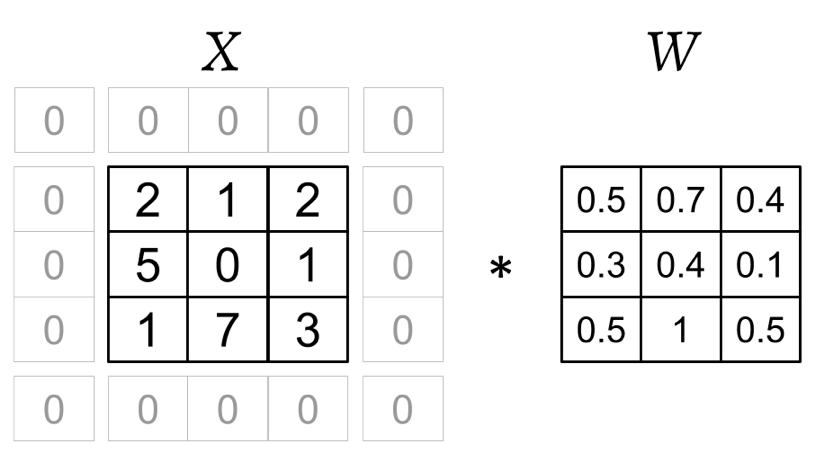%0A)

위 의 그림은 패딩 p = (1,1)과 스트라이드 s(2,2)일 때 입력 행렬 $X_{3*3}$ 과 커널 행렬 $W_{3*3}$ 사이의 2D합성곱 계산을 보여준다. 그림은 입력 행렬의 네 면에 0이 한줄씩 추가되어 $X_{5*5}^{padded}$ 행렬을 만든다.<br>
이 변환은 전치와는 다르며 넘파이에서 필터를 역전 시키려면 w_rot=W[::-1,::-1] 처럼 써야한다.

![python image2](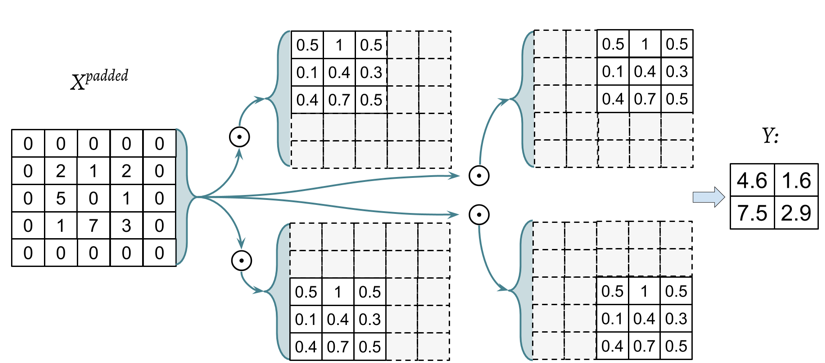%0A)

위 의 그림은  전그림의 패딩된 입력행렬 행렬$x^{padding}$를 따라 슬라이딩 윈도우처럼 역전된 필터를 이동하면서 원소별 곱의 합을 계산하는 예이다.<br>


In [2]:
import numpy as np   # 넘파이 import
import scipy.signal #사이파이 import


def conv2d(X, W, p=(0,0), s=(1,1)): #이차원 합성곱 정의
    W_rot = np.array(W)[::-1,::-1] #w_rot 배열 뒤집기
    X_orig = np.array(X)  #배열생성
    n1 = X_orig.shape[0] + 2*p[0]  #튜플 첫요소와 2*p[0] 더한걸 n1 정의
    n2 = X_orig.shape[1] + 2*p[1]  #튜플 두요소와 2*p[0] 더한걸 n2 정의
    X_padded = np.zeros(shape=(n1,n2)) #원소를 0으로 채우기
    X_padded[p[0]:p[0] + X_orig.shape[0], 
             p[1]:p[1] + X_orig.shape[1]] = X_orig #x_orig 값 넣기

    res = []                                 #리스트생성
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0])/s[0])+1, s[0]): #i 반복 범위 지정
        res.append([])
        for j in range(0, int((X_padded.shape[1] - 
                               W_rot.shape[1])/s[1])+1, s[1]): #j 반복 범위 지정
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))  #X_padded에 넣은 값과 res에 넣을값을 x_sub로 정의
    return(np.array(res))   
    
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1 , 2,0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
print('Conv2d 구현: \n', 
      conv2d(X, W, p=(1,1), s=(1,1)))

print('싸이파이 결과: \n', 
      scipy.signal.convolve2d(X, W, mode='same'))

Conv2d 구현: 
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
싸이파이 결과: 
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


# Chap 15.1.3 서브샘플링

서브 샘플링은 전형적인 두 종류의 풀링 연산으로 CNN에 적용된다.<br>
<font color='red'>최대 풀링(max-pooling)</font> 과 <font color='red'>평균 풀링(mean-pooling)</font>이 그것이다.<br>
풀링 층은 보통 $P_{{n_1} * {n_2}}$ 로 표시한다.<br>
아래에 있는 ${n_1}*{n_2}$ 은 평균 연산이 수행되는 이웃한 픽셀 크기인데 이것의 갯수를 풀링 크기라고한다.<br>


![python image2](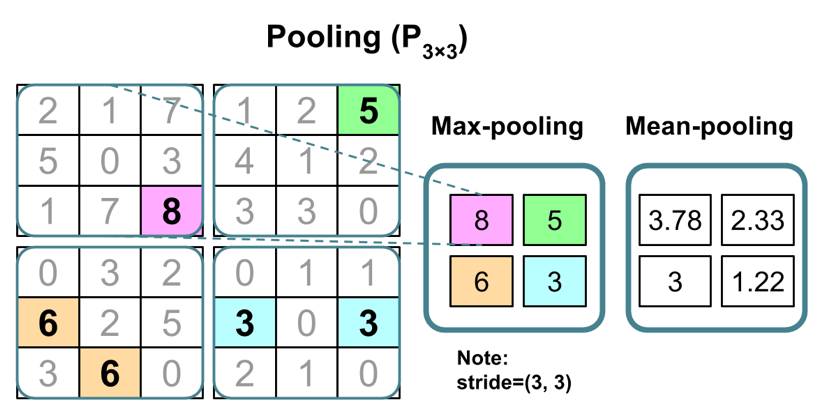%0A)

위의 그림은 서브 샘플링 연산을 적용한 그림이다.<br>
최대 풀링은 이웃한 픽셀에서 최댓값을 취하고 평균 풀링은 픽셀의 평균을 계산한다.

종합했을 떄 풀링의 장점은 2가지이다.<br>
- 풀링은 일종의 지역 불변성을 만든다.
- 풀링은 특성 크기를 줄여 계산 효율성을 높인다.

# Chap 15.2 기본 구성 요소를 사용하여 심층 합성곱 신경망 구성

이전장에서 배운 요소를 활용하여 심층CNN을 구성해보자.

# Chap 15.2.1 여러개의 입력 또는 컬러 채널 다루기

합성곱 층의 입력 샘플에는 ${N_1} * {N_2}$ 차원인 하나이상의 2D 배열 또는 행렬이 포함될 수 있다.<br>
이러한 ${N_1} * {N_2}$ 행렬을 <font color='red'>채널(channel)</font> 이라고 한다.<br>
여러개의 채널을 합성곱 층 입력에 사용하기 때문에 랭크 3 텐서, 또는 3차원 배열 $X_{{N_1}*{N_2}*{C_{in}}}$ 을 사용해야 한다.<br>
($C_{in}$은 입력 채널 크기이다.)

In [3]:
import imageio

img = imageio.imread('./example-image.png', pilmode='RGB') #저장된사진을 imread로 읽음
    
print('이미지 크기:', img.shape) #요소들 불러옴
print('채널 수:', img.shape[2]) #세번째요소를 불러옴
print('이미지 데이터 타입:', img.dtype) #unit8은 부호없는 8비트 정수

print(img[100:102, 100:102, :]) 

이미지 크기: (252, 221, 3)
채널 수: 3
이미지 데이터 타입: uint8
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


위 코드는 imageio 라이브러리를 이용하여 파이썬에서 이미지를 읽는 코드이다.<br>


이러한 채널을 여러개 다루려면 각 채널별로 합성곱 연산을 수행하고 행렬 덧셈으로 결과를 합치면 된다.<br><br>
샘플: $X_{{N_1}*{N_2}*{C_{in}}}$,<br>커널행렬 : $W_{{m_1}*{m_2}*{C_{in}}}$<br> 절편b가 주어졌을때<br>
$$Y^{conv} = \sum_{c=1}^{c_{in}} W[:,:,c] * X[:,:,c] $$<br><br>
활성화 함수의 입력:$ A = Y^{Conv} + b$<br>
특성 맵: $ H = ∅(A)$

위의 공식은 이의 과정으로 (c)별 합성곱은 개별적인 커널 행렬 W[:,:,c]를 사용한다.<br>
그후 활성화 함수에 입력되는 결과를 보여준다.<br>
최종 결과 h를 <font color='red'>특성 맵(feature map)</font> 이라고한다.<br>
CNN의 합성곱 층은 하나 이상의 특성 맵을 만든다.<br>
여러 개의 특성맵을 사용하면 커널 텐서는 $width*height*C_{in}*C_{out}$ 으로 4차원이 된다.<br>
너비와 높이는 커널의 크기이고<br>
$C_{in}$은 입력 채널의 개수이며<br>
$C_{out}$은 출력 특성 맵의 개수이다.

샘플: $X_{{N_1}*{N_2}*{C_{in}*C_{out}}}$,<br>커널행렬 : $W_{{m_1}*{m_2}*{C_{in}*C_{out}}}$<br> 절편$b_{C_{out}}$가 주어졌을때<br>
$$Y^{conv}[:,:,k] = \sum_{c=1}^{c_{in}} W[:,:,c,k] * X[:,:,c] $$<br><br>
활성화 함수의 입력: $A[:,:,k] =Y^{conv}[:,:,k] +b[k]$<br>
특성 맵: $H[:,:,k] = ∅(A[:,:,k])$

위 의 공식은 이전공식에 출력 특성 맵의 개수를 포함시킨 공식이다.

![python image2](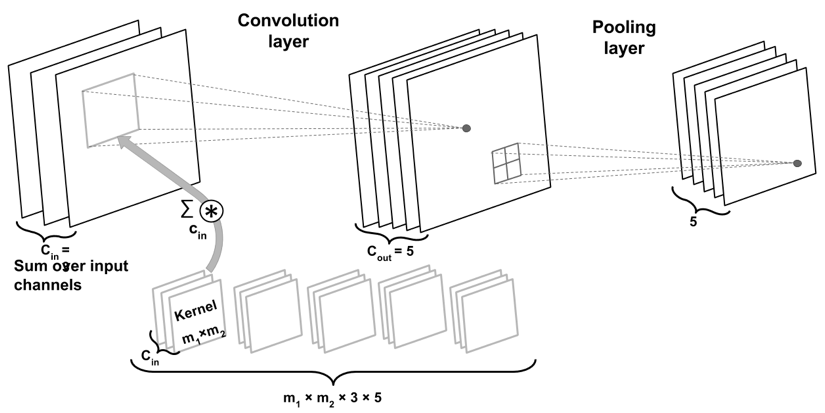%0A)

위의 그림은 합성곱 층과 풀링 층이 포함된 합성곱 계산 그림 자료이다.<br>
입력 채널이 3개가 보이는데 커널 텐서는 4차원이다.<br>
각 커널 행렬은 $m_1 * m_2$ 크기고 입력 채널에 한 개씩 총 세개이다.<br>
이런 커널 텐서가 다섯 개의 출력 특성 맵을 만들기 위해 다석개가 있다.<br>
또한 특성 맵을 서브 샘플링 하기 위해 풀링 층이 존재한다.<br>

# Chap 15.2.2 드롭아웃으로 신경망 규제

일반적인 신경망 또는 CNN 중 어떤 것을 사용하든지 네트워크 크기를 결정하는 것은 항상 어럽다.<br>
또한 성능을 위해 가중치 행렬 크기와 층 개수를 튜닝해야한다.<br>
파라미터 개수가 비교적 적은 네트워크는 용량이 작기 때문에 
<font color='red'>과소적합</font>이 자주 일어나며 성능이 나빠진다.<br>
반면 큰 네크워크는 
<font color='red'>과대적합</font>될 가능성이 크고 마찬가지로 성능이 나빠진다.<br>
결국 중간으로 절충해야하는데 한가지 방법이 있다<br>
우선 훈련 세트에서 잘 동작하도록 필요보다 큰 용량의 네트워크를 구축한다. 다음 과대적합을 막기 위해 한 개 이상의 규제 방법을 적용하여 일반화 성능을 높힌다.<br>

하지만 위에 방식보다 신경망 규제에 뛰어난 
<font color='red'>드롭아웃(drop out)</font> 이라는 방법이있다.<br>
드롭아웃은 여러개의 모델을 동시에 훈련하고 테스트나 예측 시에 평균을 효율적으로 계산하는 효율적인 방법을 제공한다.<br>

드롭아웃은 보통 깊은 층의 은닉 유닛에 적용한다.<br>
신경망의 훈련단계에서 반복마다$P_{drop}$ 확률로 은닉 유닛의 일부가 랜덤하게 꺼진다.<br>
(또는 $P_{keep} = 1 - P_{drop}$ 확률만큼 랜덤하게 켜진다.)<br>
드롭아웃 확률은 사용자가 지정하며 (p = 0.5)를 주로 쓴다.<br>
입력 뉴런에 연결된 가중치가 누락된 뉴런 비율만큼 증가한다.

랜덤한 드롭아웃으로 네트워크는 데이터에서 여분의 표현을 학습함<br>
따라서 네트워크는 은닉유닛이 꺼질 수 있기 때문에 일부 은닉 유닛의 활성화 값에 의존이 불가능하다.<br>
이는 네트워크가 데이터에서 일반적으로 패턴을 학습하게 만듦.<br>
이러한 랜덤한 드롭아웃은 과대적합을 방지한다.

![python image2](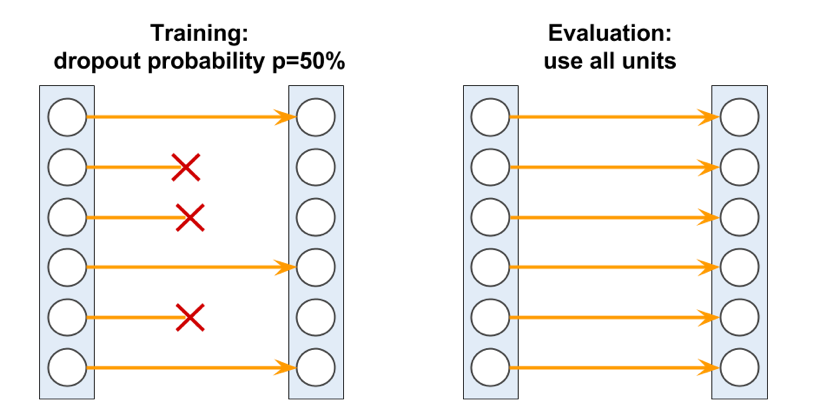%0A)

위 그림은 드롭아웃 확률이 p = 0.5인 드롭아웃의 예시이다.<br>
훈련 사진을 보면 유닛이 50퍼만 랜덤하게 꺼지고 평가 단계에서는 모든 은닉 유닛이 활성화 되는것을 볼 수 있다.<br>



# Chap 15.3 텐서플로 이용하여 심층 합성곱 신경망 구현

- CNN으로 손글씨 숫자 분류 성능을 확인하자

# Chap 15.3.1 다층 CNN구조

![python image2](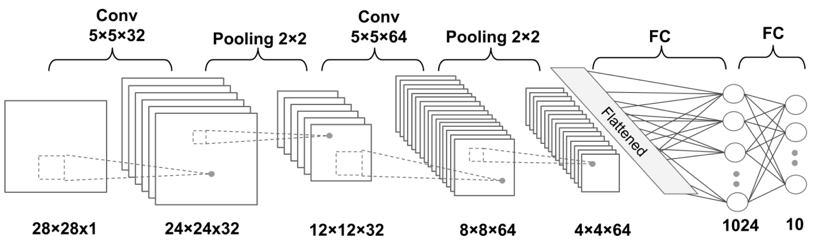%0A)

위 그림은 CNN으로 구현한 네트워크 구조이다.<br>
입력은 28x28크기의 그레이스케일 이미지이며 텐서 차원은 batchsize x 28 x 28 x 1 이 된다<br>
입력 데이터는 5 x 5크기의 커널을 가진 2개의 합성곱층을 지나며 첫 합섭곱은 32개의 특성 맵을 출력하고 두 번째는 64개의 특성맵을 출력한다. 또한 각 합성곱층 다음은 서브 샘플링으로 최대 풀링 연산이 따른다.

그림을 정리하자면<br>
- 입력:[batchsize x 28 x 28 x 1]
- 합성곱_1:[batchsize x 24 x 24 x 32]
- 풀링_1:[batchsize x 12 x 12 x 32]
- 합성곱_2:[batchsize x 8 x 8 x 64]
- 풀링_2:[batchsize x 4 x 4 x 64]
- 완전연결_1:[batchsize x 1024]
- 완전연결과 소프트맥스 층:[batchsize x 10]<br><br>
으로 다음 층이 될수록 특성맵 크기가 줄고 개수는 늘어나는것을 볼 수 있다.

# Chap 15.3.2 데이터 적제와 전처리

In [3]:
## 데이터 적제

import sys
import gzip
import shutil
import os


if (sys.version_info > (3, 0)): #모듈 버전 확인
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./')  #파일리스트 가져오기
                if f.endswith('ubyte.gz')] #이거가져오기
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read()) #집파일 열기

In [4]:
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터셋을 적재합니다."""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' #각종 데이터를 경로사용해 넣는다.
                                % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:   #경로를 lbpath로 정의후 열기
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,             #행렬 저장후 로드
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [6]:
X_data, y_data = load_mnist('./', kind='train') #손글시 데이터를 x,y데이터 넣기
print('행: %d,  열: %d' % (X_data.shape[0], X_data.shape[1]))
X_test, y_test = load_mnist('./', kind='t10k')   #테스트 데이터 넣기
print('행: %d,  열: %d' % (X_test.shape[0], X_test.shape[1]))

X_train, y_train = X_data[:50000,:], y_data[:50000]
X_valid, y_valid = X_data[50000:,:], y_data[50000:]

print('훈련 세트:   ', X_train.shape, y_train.shape) #각종 세트 출력
print('검증 세트: ', X_valid.shape, y_valid.shape)
print('테스트 세트:   ', X_test.shape, y_test.shape)

행: 60000,  열: 784
행: 10000,  열: 784
훈련 세트:    (50000, 784) (50000,)
검증 세트:  (10000, 784) (10000,)
테스트 세트:    (10000, 784) (10000,)


위 의 코드는 load_mnist 함수를 사용하여 MNIST손글씨 숫자 데이터셋을 읽었다.<br>
데이터를 훈련세트, 검증세트, 테스트세트로 나눈후 각 세트의 크기를 나타낸다.

훈련성능을 올리고 최적 값에 수렴하려면 <font color='red'>정규화</font>를 해야한다

훈련데이터의 특성마다 평균을 계산하고 모든 특성에 걸쳐 표준 편차를 계산한다.<br>
각 특성별로 표준 편차를 계산하지 않은 이유는 MNIST 같은 이미지 데이터셋에 있는 일부 특성값은 모든 이미지에서 동일하게 255이기 떄문<br>
이 값은 그레이스케일 이미지에 있는 흰 픽셀에 해당<br>

모든 샘플에서 고정된 값이면 변동이 없고 표준편차가 0이 되므로 0-나눗셈 에러가 발생<br>
이런이유로 훈련데이터 전체의 표준 편차를 계산하기 위해 np.std 함수의 axis매개변수를 지정하지 않는다.<br>

In [7]:
mean_vals = np.mean(X_train, axis=0) #0번째열 x_train행 평균계산
std_val = np.std(X_train) #x train 표준편차계산

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

위의 코드는 이미지를 2차원 배열로 읽은 것이다.<br>
샘플마다 하나의 행을 차지하여 784개의 픽셀에 해당하는 열이 있다.<br>
합성곱 신경망에 데이터를 주입하려면 784개의 행을 원본 이미지의 차원과 동일한 28x28x1 크기로 바꿔야한다.<br>
MNIST 이미지는 흑백이미지이므로 마지막 컬러 채널이 의미가 없다. 하지만 합성곱 연산에는 필요하다.

In [8]:
X_train_centered = X_train_centered.reshape((-1, 28, 28, 1))#reshape로 데이터 차원변경
X_valid_centered = X_valid_centered.reshape((-1, 28, 28, 1))
X_test_centered = X_test_centered.reshape((-1, 28, 28, 1))

In [9]:
from tensorflow.keras.utils import to_categorical #to categorical로 원핫 인코딩 변경

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

In [10]:
print(y_train[0], y_train_onehot[0]) #인코딩 시험, 5를 가리키므로 6번째에 1부여

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
print('훈련 세트: ', X_train_centered.shape, y_train_onehot.shape)#변경된각세트크기 출력
print('검증 세트: ', X_valid_centered.shape, y_valid_onehot.shape)
print('테스트 세트: ', X_test_centered.shape, y_test_onehot.shape)

훈련 세트:  (50000, 28, 28, 1) (50000, 10)
검증 세트:  (10000, 28, 28, 1) (10000, 10)
테스트 세트:  (10000, 28, 28, 1) (10000, 10)


# Chap 15.3.3 텐서플로 tf.keras API로 CNN구성

tf.keras API로 합성곱 네트워크를 구현 가능하다.


In [12]:
from tensorflow.keras import layers, models ## keras 하위모듈중 layers models를 임포트

In [13]:
model = models.Sequential() ##sequential 클래스의 객채 생성
model.add(layers.Conv2D(32, (5,5), padding = 'valid', ## conv2d클래스를 모델에추가후
                       activation = 'relu', input_shape=(28, 28,1)))#객체를 add 메서드에 전달
model.add(layers.MaxPool2D((2, 2)))
#--------------------------
model.add(layers.Conv2D(64, (5, 5), padding='valid', 
                        activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten()) #일렬펼침
model.add(layers.Dense(1024, activation='relu')) # 완전 연결층 연결
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


위의 코드는 합성곱 네트워크를 만드는 과정이다.<br>
keras를 import후 Sequential클래스의 객체를 만든다.<br>
그후 conv2d클래스를 모델에 추가후 그 클래스객체를 model의 add메서드에 전달 (32 = 필터 갯수 5x5는 필터크기)<br>
패딩 종류는 패딩이 0인 밸리드패딩을 사용하고 relu활성화 함수를 사용후 마지막으로 입력크기를 28x28x1로 설정한다.<br>
그후 풀링층을 높이 너비를 (2,2)로 설정한다.<br>

다음은  각 5x5크기 필터64개 밸리드 패딩, relu활성화 함수인 두번째 합성곱층인conv2d를 추가한다.<br>
출력크기는 각각 x=12 w=5 p=0 s=1이다.<br>
그후 두번째 풀링층을 첫번째와 같은 크기로 설정한다.<br>
다음으로 flatten클래스로 4x4x64차원의 텐서를 일렬로 펼친다.<br>
펼친 1024차원의 텐서를 1024개의 유닛을 가진 완전 연결층에 연결한다.<br>
1024텐서를 1024개 유닛에 연결했으므로 가중치가 1,049,600개가 된다.<br>
그후 드롭아웃층을 50%확률로 만듬<br>
마지막으로 10개의 유닛을 가진 완전연결층을 만든다.

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
__________

위의 코드는 그에대한 결과를 나열한것이다.

# Chap 15.3.4 합성곱 신경망 모델 훈련

모델을 컴파일해보자

In [15]:
model.compile(loss='categorical_crossentropy', #범주형 크로스 엔트로피 사용하여 다중분류
              optimizer='adam', metrics=['acc']) #옵티마이저와 metrics 매개변수에 acc추가

In [16]:
import time #시간표현 모듈
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
#모델 훈련데때 최선의 가중치를 저장하기위해 model checkpoint 콜백사용
#콜백은 검증손실을 모니터링하고 최상의 가중치를 cnn_checkpoint.h5파일에 저장 
callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', 
                                 monitor='val_loss', 
                                 save_best_only=True),
                 TensorBoard(log_dir="logs/{}".format(time.asctime()))]
#텐서보드 콜백은 logs dir에 서브dir를 만들어 통계를 저장
#asctime을 써서 실행할때마다 시간이 저장되는 서브dir만듦

In [17]:
history = model.fit(X_train_centered, y_train_onehot, 
                    batch_size=64, epochs=20, 
                    validation_data=(X_valid_centered, y_valid_onehot),
                    callbacks=callback_list)
#데이터들을 준비후 학습 데이터 개수를 64로 만들어 20번 반복학습

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.


InvalidArgumentError: Failed to create a directory: logs/Wed Jan 29 00:55:30 2020; Invalid argument

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 87us/sample - loss: 0.1377 - acc: 0.9564 - val_loss: 0.0577 - val_acc: 0.9838
Epoch 2/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0508 - val_acc: 0.9852
Epoch 3/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0363 - acc: 0.9891 - val_loss: 0.0431 - val_acc: 0.9873
Epoch 4/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0329 - val_acc: 0.9922
Epoch 5/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0371 - val_acc: 0.9907
Epoch 6/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0370 - val_acc: 0.9924
Epoch 7/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0393 - val_acc: 0.9911
Epoch 8/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0183 - acc: 0.9945 - val_loss: 0.0322 - val_acc: 0.9929
Epoch 9/20
50000/50000 [==============================] - 4s 71us/sample - loss: 0.0147 - acc: 0.9954 - val_loss: 0.0427 - val_acc: 0.9909
Epoch 10/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0430 - val_acc: 0.9911
Epoch 11/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0421 - val_acc: 0.9901
Epoch 12/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0502 - val_acc: 0.9908
Epoch 13/20
50000/50000 [==============================] - 3s 68us/sample - loss: 0.0130 - acc: 0.9962 - val_loss: 0.0553 - val_acc: 0.9899
Epoch 14/20
50000/50000 [==============================] - 3s 68us/sample - loss: 0.0110 - acc: 0.9967 - val_loss: 0.0506 - val_acc: 0.9910
Epoch 15/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.0113 - acc: 0.9969 - val_loss: 0.0569 - val_acc: 0.9908
Epoch 16/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0686 - val_acc: 0.9903
Epoch 17/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0124 - acc: 0.9967 - val_loss: 0.0794 - val_acc: 0.9893
Epoch 18/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0083 - acc: 0.9977 - val_loss: 0.0573 - val_acc: 0.9909
Epoch 19/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0098 - acc: 0.9974 - val_loss: 0.0779 - val_acc: 0.9900
Epoch 20/20
50000/50000 [==============================] - 4s 72us/sample - loss: 0.0114 - acc: 0.9970 - val_loss: 0.0795 - val_acc: 0.9902

In [20]:
import matplotlib.pyplot as plt #차트그리는 모듈

In [21]:
epochs = np.arange(1, 21) #1부터 20번째 까지 범위선택
plt.plot(epochs, history.history['loss'])  #손실 그래프 입력
plt.plot(epochs, history.history['val_loss']) #검증손실 그래프 입력
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

NameError: name 'history' is not defined

![python image2](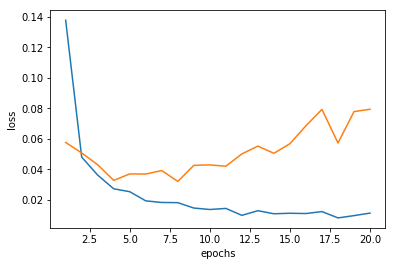%0A)

In [22]:
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

NameError: name 'history' is not defined

![python image2](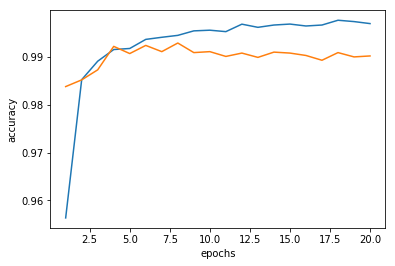%0A)

In [23]:
!ls -al logs/ #실행한 로그들 보기

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


합계 16<br>
drwxr-xr-x 4 haesun haesun 4096  3월 15 11:24  .<br>
drwxrwxr-x 7 haesun haesun 4096  3월 15 11:24  ..<br>
drwxr-xr-x 2 haesun haesun 4096  3월 15 11:23  .ipynb_checkpoints<br>
drwxr-xr-x 5 haesun haesun 4096  3월 15 11:24 'Fri Mar 15 11:24:15 2019'

훈련된 모델을 사용하여 모델과 가중치를 저장하여 복원해보겠다.

In [24]:
model.save('cnn_model.h5') #모델과 가중치 저장

In [25]:
from tensorflow.keras.models import load_model #불러오기 가능한 모듈 import

restored_model = load_model('cnn_model.h5')#load_model로 저장된모델 불러 객체만들기
restored_model.load_weights('cnn_checkpoint.h5')# 이전 훈련과정서 높은성능의 가중치 파일 복원

OSError: Unable to open file (unable to open file: name = 'cnn_checkpoint.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [26]:
restored_model.evaluate(X_test_centered, y_test_onehot) #복원된 파일로 테스트세트에서 평가

10000/10000 [==============================] - 2s 204us/sample - loss: 2.3480 - acc: 0.0888


[2.348025447845459, 0.0888]

In [27]:
np.argmax(restored_model.predict(X_test_centered[:10]), axis=1)
#테스트 샘플마다 반환된 숫자 10개 확률값중 argmax로 큰 인덱스를 찾는다.

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [28]:
y_test[:10] #찾은레이블 인덱스와 레이블 값이 같은지 10개 뽑아서 확인

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

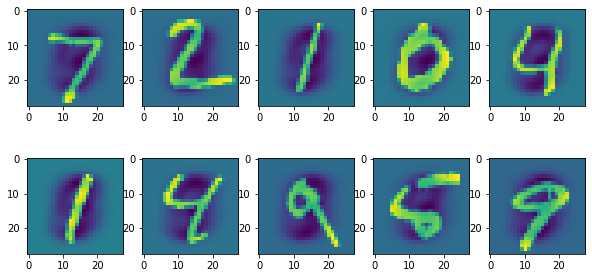

In [29]:
fig = plt.figure(figsize=(10, 5)) #figure 생성
for i in range(10):
    fig.add_subplot(2, 5, i+1) #2x5 칸에 10개 생성
    plt.imshow(X_test_centered[i].reshape(28, 28)) #사진 출력

# Chap 15.3.5 활성화 출력과 필터 시각화

In [30]:
first_layer = model.layers[0] #첫번째 층의 객체 추출
print(first_layer)

In [31]:
print(model.input)#자동 정의이된 model의 input속성 확인

Tensor("conv2d_input:0", shape=(?, 28, 28, 1), dtype=float32)


In [32]:
first_activation = models.Model(inputs=model.input,  #입력과 출력텐서로 새 모델만듦
                                outputs=first_layer.output)
activation = first_activation.predict(X_test_centered[:10])#테스트데이터의 데이터10개 넣기

In [33]:
print(activation.shape) #4차원의 첫 차원10에 크기가 24x24, 필터가 32인 크기 확인

(10, 24, 24, 32)


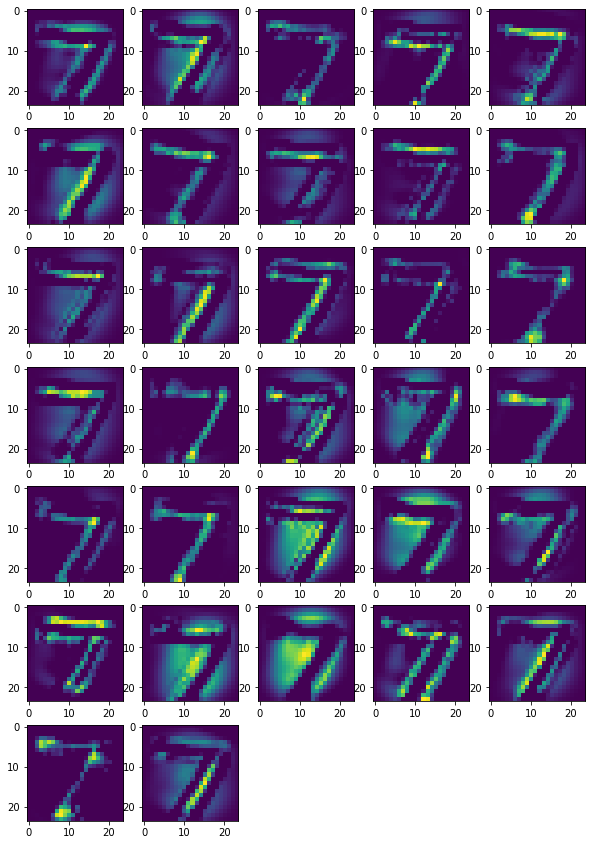

In [34]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1) #7행5열의 데이터 32개 뽑기
    plt.imshow(activation[0, :, :, i])

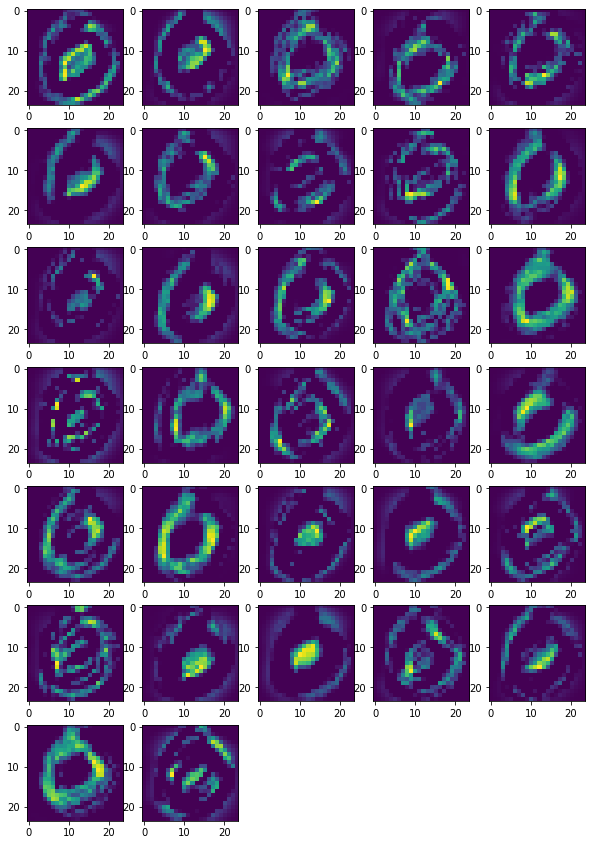

In [35]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[3, :, :, i])

TypeError: Image data of dtype object cannot be converted to float

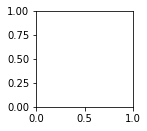

In [36]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(first_layer.kernel[:, :, 0, i]) #높이 너비 입출력 채널 설정후 필터 그리기

![python image2](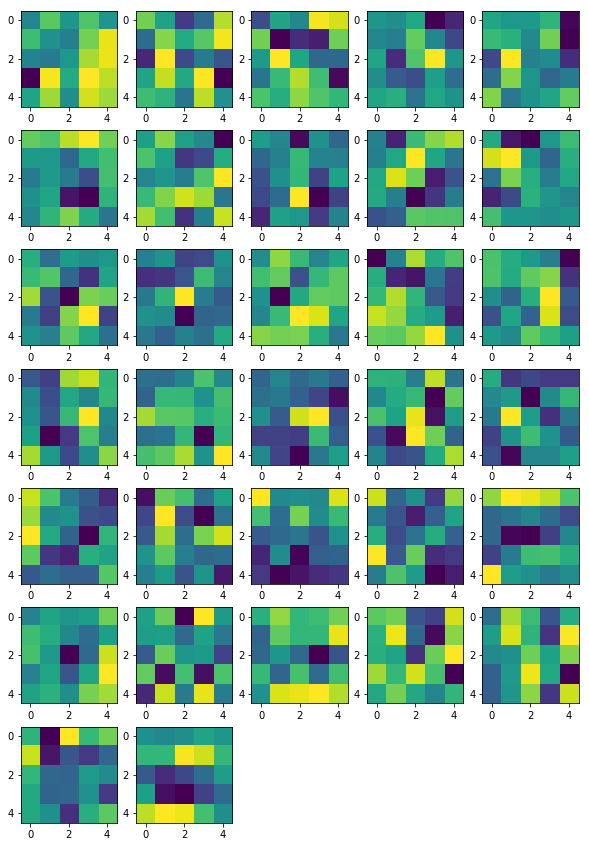%0A)

위 사진은 필터를 그린 사진이다. 필터의 밝은 부분이 높은값을 의미한다.

# Chap 15.4 요약

- CNN과 CNN구성하는 기본요소를 배웠다
- 합성곱 연산을 정의하고1D 2D 합성곱을 터득하였다.
- 폴링 방식을 배웠다.
- 최종으로 심층 합성곱 신경망을 만들었다.

In [ ]:
restored_model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=20, 
                   validation_data=(X_valid_centered, y_valid_onehot))